In [76]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import locale
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
Wong = ['#000000', '#E69F00', '#56B4E9',
        '#009E73', '#F0E442', '#0072B2',
        '#D55E00', '#CC79A7']


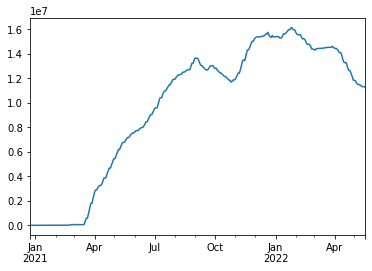

In [77]:
vacunacion = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto76/vacunacion_t.csv', header=[0, 1], index_col=0)
vacunacion_tot = vacunacion['Total'].copy()
vacunacion_tot.columns.name = 'Fecha'
vacunacion_tot['Esquema_completo'] = vacunacion_tot['Segunda'].shift(14) + vacunacion_tot['Unica'].shift(14).fillna(0)
vacunacion_tot['Esquema_completo_diario'] = vacunacion_tot['Esquema_completo'].diff()
vacunacion_tot['Refuerzo_diario'] = vacunacion_tot['Refuerzo'].diff()
vacunacion_tot['Cuarta_diario'] = vacunacion_tot['Cuarta'].diff()
vacunacion_tot['Esquema_completo_actualizado'] = vacunacion_tot['Esquema_completo_diario'] + vacunacion_tot['Refuerzo_diario'].shift(14).fillna(0) + vacunacion_tot['Cuarta_diario'].shift(14).fillna(0) - vacunacion_tot['Esquema_completo_diario'].shift(168).fillna(0)  - vacunacion_tot['Refuerzo_diario'].shift(168).fillna(0) - vacunacion_tot['Cuarta_diario'].shift(168).fillna(0)
vacunacion_tot = vacunacion_tot.fillna(0)
vacunacion_tot.index = pd.to_datetime(vacunacion_tot.index)
vacunacion_tot.to_csv('test.tsv')
# vacunacion_tot
vacunacion_tot['Esquema_completo_actualizado'].cumsum().plot()
# vacunacion_tot['Esquema_completo'].plot()
piramide_chile_INE = { # INE - Proyección base 2017
    '>=70': 1_614_364,
    '60-69': 1_857_879,
    '50-59': 2_392_614,
    '40-49': 2_658_453,
    '<=39': 11_155_053,
}


In [78]:
vacunacion_tot

Fecha,Primera,Segunda,Unica,Refuerzo,Cuarta,Esquema_completo,Esquema_completo_diario,Refuerzo_diario,Cuarta_diario,Esquema_completo_actualizado
2020-12-24,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-25,5200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-26,8340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-27,8649.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,8649.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-13,17358872.0,16912904.0,574648.0,14209377.0,5149190.0,17460682.0,2831.0,25745.0,155552.0,-10050.0
2022-05-14,17359308.0,16913465.0,574648.0,14217706.0,5185850.0,17461161.0,479.0,8329.0,36660.0,-773.0
2022-05-15,17359332.0,16913510.0,574648.0,14218380.0,5188917.0,17461161.0,0.0,674.0,3067.0,-2678.0
2022-05-16,17361582.0,16916380.0,574649.0,14244251.0,5359817.0,17463864.0,2703.0,25871.0,170900.0,-17713.0


<AxesSubplot:>

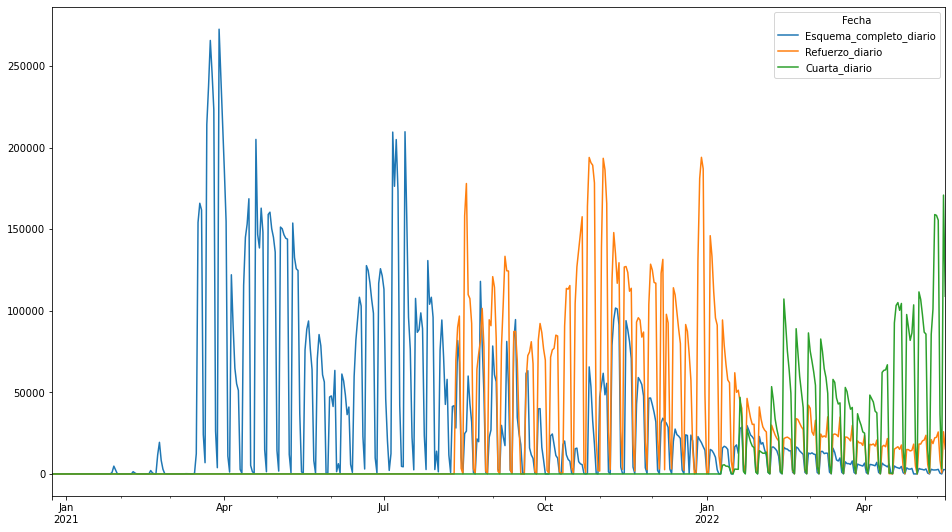

In [79]:
vacunacion_tot[['Esquema_completo_diario', 'Refuerzo_diario', 'Cuarta_diario']].plot(figsize=(16,9))

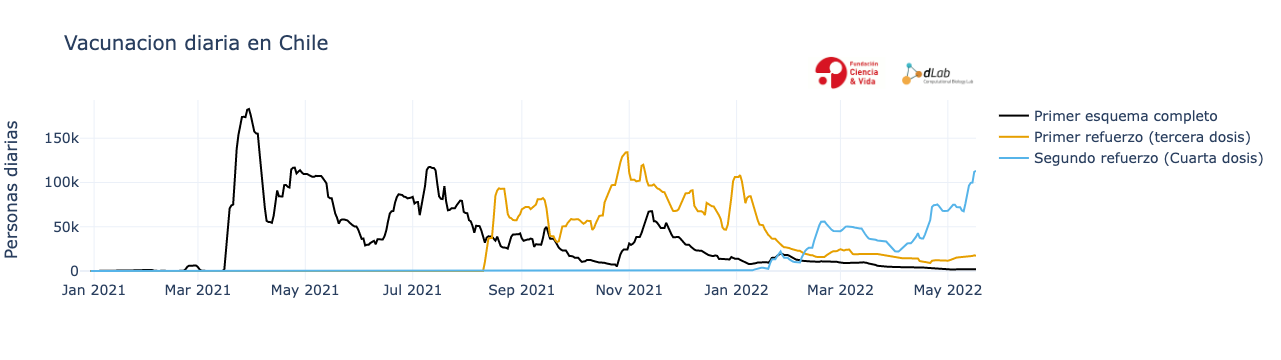

In [80]:
fig = go.Figure([
    go.Scatter(
        name='Primer esquema completo',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Esquema_completo_diario'].rolling(7).mean(),
        mode='lines',
        marker=dict(color=Wong[0]),
        showlegend=True
    ),
    go.Scatter(
        name='Primer refuerzo (tercera dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Refuerzo_diario'].rolling(7).mean(),
        mode='lines',
        marker=dict(color=Wong[1]),
        showlegend=True
    ),
    go.Scatter(
        name='Segundo refuerzo (Cuarta dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Cuarta_diario'].rolling(7).mean(),
        marker=dict(color=Wong[2]),
        mode='lines',
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Personas diarias',
    title='Vacunacion diaria en Chile',
    hovermode="x"
)
fig.update_layout(
    template='plotly_white',
    font=dict(
        size=14,
    ),
)
fig.add_layout_image(
    dict(
        source="https://i2.wp.com/dlab.cl/wp-content/uploads/2016/08/LogoWebDlab.png",
        xref="paper", yref="paper",
        x=1, y=1.05,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

fig.show()
fig.write_html('diario.html')

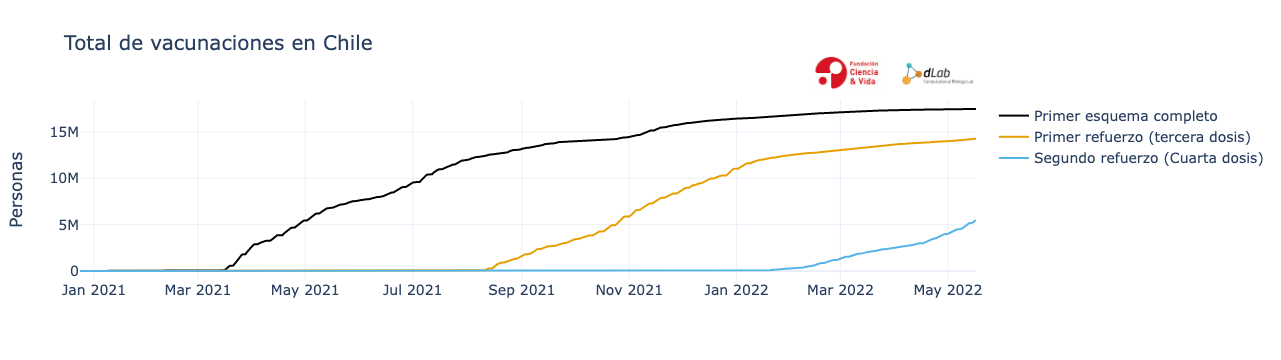

In [81]:
fig = go.Figure([
    go.Scatter(
        name='Primer esquema completo',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Esquema_completo_diario'].cumsum(),
        mode='lines',
        marker=dict(color=Wong[0]),
        showlegend=True
    ),
    go.Scatter(
        name='Primer refuerzo (tercera dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Refuerzo_diario'].cumsum(),
        mode='lines',
        marker=dict(color=Wong[1]),
        showlegend=True
    ),
    go.Scatter(
        name='Segundo refuerzo (Cuarta dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Cuarta_diario'].cumsum(),
        marker=dict(color=Wong[2]),
        mode='lines',
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Personas',
    title='Total de vacunaciones en Chile',
    hovermode="x"
)
fig.update_layout(
    template='plotly_white',
    font=dict(
        size=14,
    ),
)
fig.add_layout_image(
    dict(
        source="https://i2.wp.com/dlab.cl/wp-content/uploads/2016/08/LogoWebDlab.png",
        xref="paper", yref="paper",
        x=1, y=1.05,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

fig.show()
fig.write_html('total.html')

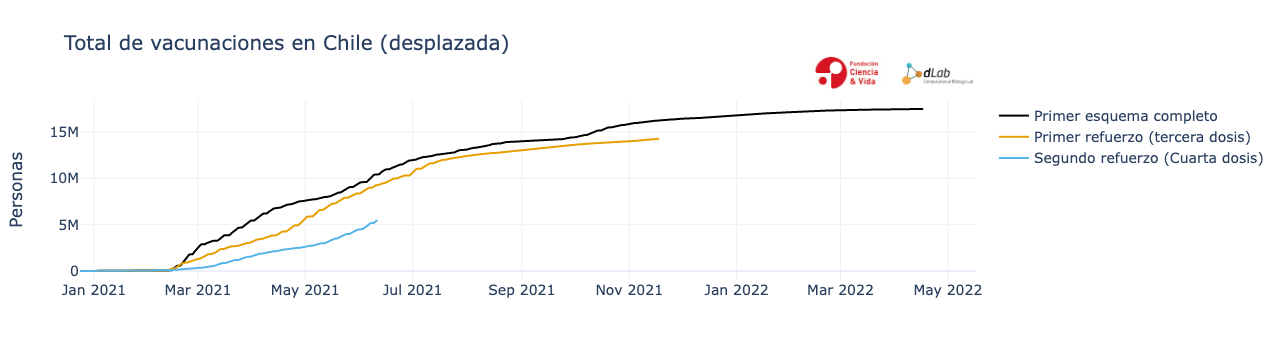

In [82]:
fig = go.Figure([
    go.Scatter(
        name='Primer esquema completo',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Esquema_completo_diario'].cumsum().shift(-30),
        mode='lines',
        marker=dict(color=Wong[0]),
        showlegend=True
    ),
    go.Scatter(
        name='Primer refuerzo (tercera dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Refuerzo_diario'].cumsum().shift(-180),
        mode='lines',
        marker=dict(color=Wong[1]),
        showlegend=True
    ),
    go.Scatter(
        name='Segundo refuerzo (Cuarta dosis)',
        x=vacunacion_tot.index,
        y=vacunacion_tot['Cuarta_diario'].cumsum().shift(-340),
        marker=dict(color=Wong[2]),
        mode='lines',
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Personas',
    title='Total de vacunaciones en Chile (desplazada)',
    hovermode="x"
)
fig.update_layout(
    template='plotly_white',
    font=dict(
        size=14,
    ),
)
fig.add_layout_image(
    dict(
        source="https://i2.wp.com/dlab.cl/wp-content/uploads/2016/08/LogoWebDlab.png",
        xref="paper", yref="paper",
        x=1, y=1.05,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

fig.write_html('compar.html')